In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import math
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns

from ProjectTools import OpenBeds

In [2]:
dry = True

def filterDepth(df):
    average = df["readCount"].mean()
    df = df[df["readCount"].ge(10)]
    df = df[df["readCount"].le(average + 3*math.sqrt(average))]
    # df = df.loc[df["readCount"] == 15] # Testing constant readcount

    return df

if dry == True:
    wgbs_bed_path = './test_data/ENCSR893RHD_modifications_mm39_sub.bed'
    tab_bed_path = './test_data/CRR008807_TAB_merged.bedGraph.gz.bismark.zero.cov_sub.bed'

    nano_2mod_path = './test_data/prom_R10.4.1_E8.2_WGS_brain_DH_5mC_nonAggregated_sub.bedMethyl'
    nano_3mod_path = './test_data/prom_R10.4.1_E8.2_WGS_brain_0.9.1_mods_sub.bed'
    
    dud_df, nano_hmc_df = OpenBeds.get_nanopore_threeMod(nano_3mod_path)
    del dud_df

    nano_hmc_df = filterDepth(nano_hmc_df)
    nano_mc_df = filterDepth(OpenBeds.get_nanopore_twoMod(nano_2mod_path))
    wgbs_df = filterDepth(OpenBeds.get_wgbs(wgbs_bed_path))
    tab_df = filterDepth(OpenBeds.get_tab(tab_bed_path))

else:
    wgbs_bed_path = './data/ENCSR893RHD_modifications_mm39.bed'
    tab_bed_path = './data/CRR008807_TAB_merged.bedGraph.gz.bismark.zero.cov'
    nano_2mod_path = './data/prom_R10.4.1_E8.2_WGS_brain_DH_5mC_nonAggregated.bedMethyl'
    nano_3mod_path = './data/prom_R10.4.1_E8.2_WGS_brain_0.9.1_mods.bed'

    dud_df, nano_hmc_df = OpenBeds.get_nanopore_threeMod(nano_3mod_path)
    del dud_df

    nano_hmc_df = filterDepth(nano_hmc_df)
    nano_mc_df = filterDepth(OpenBeds.get_nanopore_twoMod(nano_2mod_path))
    wgbs_df = filterDepth(OpenBeds.get_wgbs(wgbs_bed_path))
    tab_df = filterDepth(OpenBeds.get_tab(tab_bed_path))


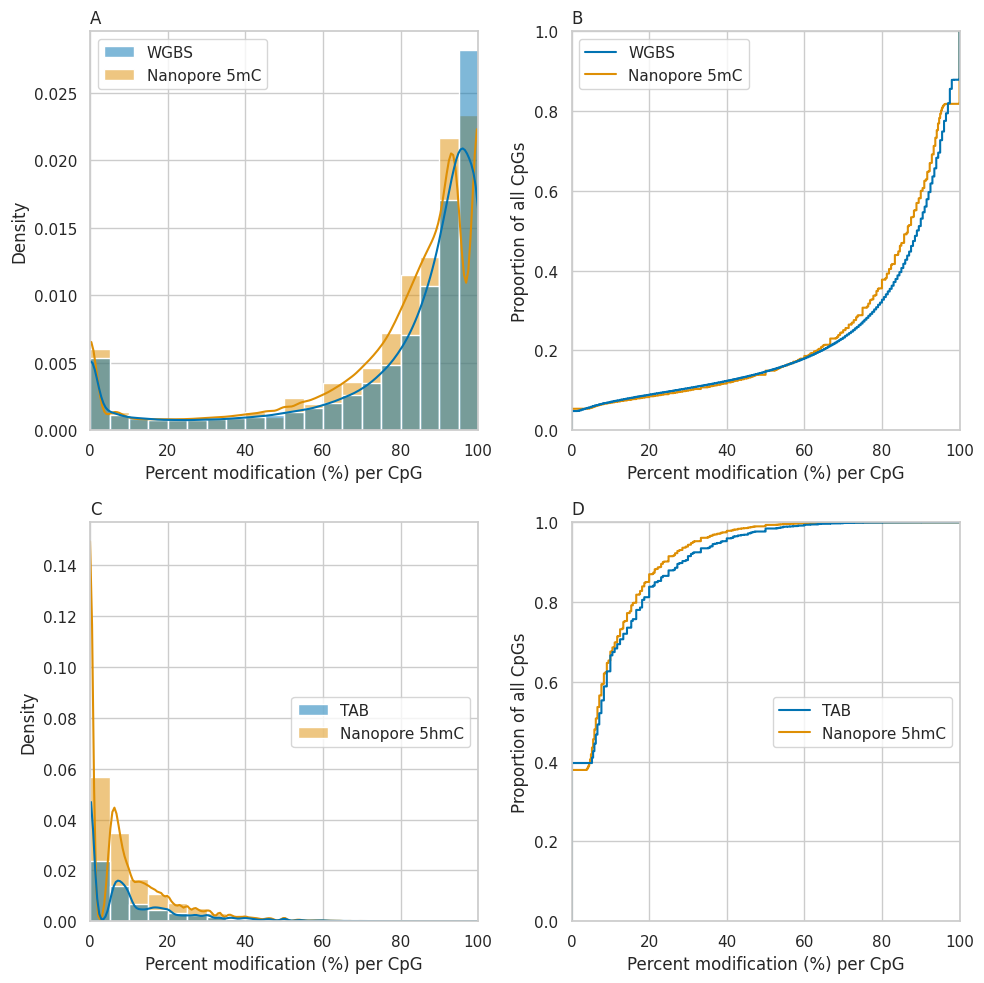

In [3]:
sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")

fig2 = pl.figure(figsize=(10, 10)) 
gs = fig2.add_gridspec(nrows=2, ncols=2)

ax1 = fig2.add_subplot(gs[0, 0])
ax2 = fig2.add_subplot(gs[0, 1])
ax3 = fig2.add_subplot(gs[1, 0])
ax4 = fig2.add_subplot(gs[1, 1])

ecdf_df = pd.concat([wgbs_df, nano_mc_df, tab_df, nano_hmc_df], ignore_index=True)

sns.kdeplot(ecdf_df.loc[ecdf_df["modification_type"] == "5mC"], x="percentMeth", hue="method", ax=ax1, fill=False)
sns.histplot(ecdf_df.loc[ecdf_df["modification_type"] == "5mC"], x="percentMeth", hue="method", stat="density", binrange=(0, 100), bins=20, multiple="layer", ax=ax1)
sns.move_legend(ax1, "upper left", title=None)
ax1.set_xlabel("Percent modification (%) per CpG")
ax1.set_xlim([0, 100])
ax1.set_title("A", loc="left")

sns.ecdfplot(ecdf_df.loc[ecdf_df["modification_type"] == "5mC"], x="percentMeth", hue="method", ax=ax2)
sns.move_legend(ax2, "upper left", title=None)
ax2.set_ylabel("Proportion of all CpGs")
ax2.set_xlabel("Percent modification (%) per CpG")
# ax1.set_xticks(np.arange(0, 120, 20), labels=["0.0", "0.2", "0.4", "0.6", "0.8", "1.0"]) # to make proportions instead of percentages 
ax2.set_title("B", loc="left")
ax2.set_xlim([0, 100])

sns.kdeplot(ecdf_df.loc[ecdf_df["modification_type"] == "5hmC"], x="percentMeth", hue="method", common_norm=True, ax=ax3)
sns.histplot(ecdf_df.loc[ecdf_df["modification_type"] == "5hmC"], x="percentMeth", hue="method", stat="density", common_norm=True, binrange=(0, 100), bins=20, multiple="layer", ax=ax3)
sns.move_legend(ax3, "center right", title=None)
ax3.set_title("C", loc="left")
ax3.set_xlabel("Percent modification (%) per CpG")
ax3.set_xlim([0, 100])

sns.ecdfplot(ecdf_df.loc[ecdf_df["modification_type"] == "5hmC"], x="percentMeth", hue="method", ax=ax4)
sns.move_legend(ax4, "center right", title=None)
ax4.set_ylabel("Proportion of all CpGs")
ax4.set_xlabel("Percent modification (%) per CpG")
ax4.set_xlim([0, 100])
ax4.set_title("D", loc="left")

fig2.tight_layout()

In [4]:
from scipy import stats
from scipy import optimize

beta_dist = stats.beta.rvs(2, 2, size=5000)


In [6]:
import distfit

dist = distfit.distfit()

In [7]:
dist.fit_transform(beta_dist)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.941487] [loc=0.500 scale=0.223]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 14.1879] [loc=0.003 scale=0.497]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 14.1879] [loc=-33554431.997 scale=33554432.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 2.60447] [loc=0.497 scale=0.204]
[distfit] >INFO> [t         ] [0.27 sec] [RSS: 0.941777] [loc=0.500 scale=0.223]
[distfit] >INFO> [genextreme] [0.24 sec] [RSS: 10.3171] [loc=0.145 scale=0.881]
[distfit] >INFO> [gamma     ] [0.08 sec] [RSS: 0.942244] [loc=-57.608 scale=0.001]
[distfit] >INFO> [lognorm   ] [0.16 sec] [RSS: 0.947625] [loc=-15.858 scale=16.357]
[distfit] >INFO> [beta      ] [0.05 sec] [RSS: 0.15792] [loc=-0.002 scale=1.002]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 5.05939] [loc=0.003 scale=0.990]
[distfit] >INFO> [loggamma  ] [0.06 sec] [RSS: 0.931475] [loc=-35.923 scale=5.638]
[distfit] >INFO> Compute confidence interval

{'model': {'name': 'beta',
  'score': 0.15791975338920725,
  'loc': -0.002244689064581634,
  'scale': 1.0021045771315396,
  'arg': (2.0302987738549527, 2.019322400613733),
  'params': (2.0302987738549527,
   2.019322400613733,
   -0.002244689064581634,
   1.0021045771315396),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f3b7afd0790>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 0.13599523381194747,
  'CII_max_alpha': 0.8635047058758777},
 'summary':           name      score              loc       scale  \
 0         beta    0.15792        -0.002245    1.002105   
 1     loggamma   0.931475       -35.922859    5.637906   
 2         norm   0.941487         0.500127    0.222717   
 3            t   0.941777         0.500129    0.222708   
 4        gamma   0.942244       -57.607681    0.000854   
 5      lognorm   0.947625       -15.858299   16.357136   
 6     dweibull   2.604473         0.497362    0.203831   
 

In [9]:
mc_benchmark = ecdf_df.loc[ecdf_df["method"] == "WGBS", ["percentMeth"]].to_numpy()
dist.fit_transform(mc_benchmark)

[distfit] >INFO> Cleaning previous fitted model results.
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0878987] [loc=77.514 scale=28.078]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.105155] [loc=0.000 scale=77.514]
[distfit] >INFO> [pareto    ] [0.48 sec] [RSS: 0.104919] [loc=-0.000 scale=0.000]
[distfit] >INFO> [dweibull  ] [7.82 sec] [RSS: 0.0722717] [loc=92.000 scale=14.569]
[distfit] >INFO> [t         ] [25.7 sec] [RSS: 0.0880311] [loc=77.751 scale=28.063]
[distfit] >INFO> [genextreme] [24.0 sec] [RSS: 0.0491375] [loc=77.972 scale=26.898]
[distfit] >INFO> [gamma     ] [6.59 sec] [RSS: 0.334887] [loc=-0.000 scale=7.589]
[distfit] >INFO> [lognorm   ] [10.7 sec] [RSS: 0.115799] [loc=-1.020 scale=38.190]
[distfit] >INFO> [beta      ] [8.65 sec] [RSS: 0.0382598] [loc=-10.344 scale=110.344]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0937532] [loc=0.000 scale=100.000]
[distfit] >INFO> [loggamma  ] [3.98 sec] [RSS: 0.0592536] [l

{'model': {'name': 'beta',
  'score': 0.03825984529153421,
  'loc': -10.34445494682642,
  'scale': 110.34445494682643,
  'arg': (0.9010336838874706, 0.19273540636905995),
  'params': (0.9010336838874706,
   0.19273540636905995,
   -10.34445494682642,
   110.34445494682643),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7f3b7afd1960>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': 10.483012467833042,
  'CII_max_alpha': 99.9999771431272},
 'summary':           name     score         loc       scale  \
 0         beta   0.03826  -10.344455  110.344455   
 1   genextreme  0.049138   77.971662   26.898096   
 2     loggamma  0.059254  100.001348         0.0   
 3     dweibull  0.072272        92.0   14.568632   
 4         norm  0.087899    77.51393   28.078467   
 5            t  0.088031   77.750751   28.063033   
 6      uniform  0.093753         0.0       100.0   
 7       pareto  0.104919        -0.0         0.0   
 

[distfit] >INFO> Ploting CDF


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nbeta(a=0.901034, b=0.192735, loc=-10.3445, scale=110.344)'}, xlabel='Values', ylabel='Frequency'>)

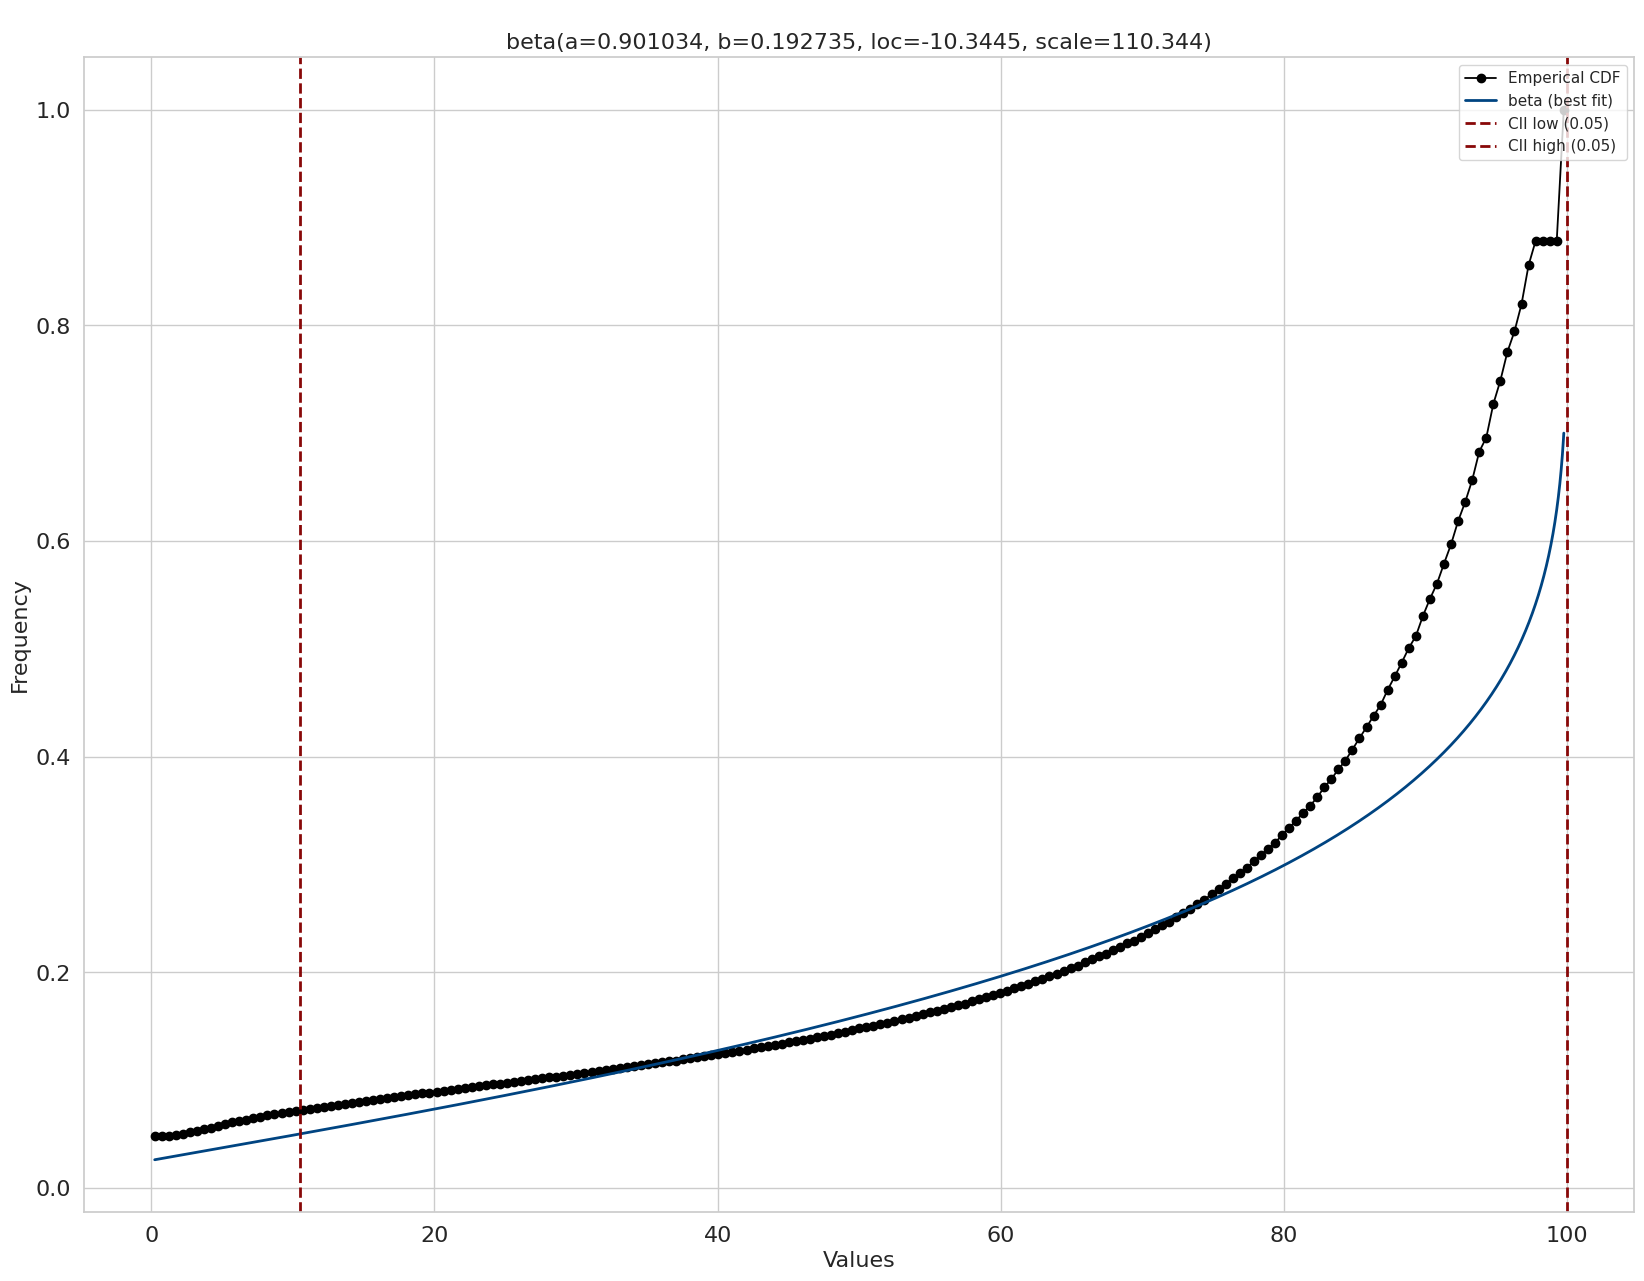

In [31]:
dist.plot_cdf()

In [4]:
def mergeModDFs(mod_df1, mod_df2):
    on_list = ["chromosome", "chromStart", "chromEnd", "modification_type"]
    redundant_cols = ["method", "readCount"]

    if mod_df1["method"].str.contains("Nanopore").all() == True:
        suffixes = ["_Nano", "_BS" ]
    else:
        suffixes = ["_BS", "_Nano"]

    merged = pd.merge(mod_df1.drop(columns=redundant_cols), 
                      mod_df2.drop(columns=redundant_cols), 
                      "inner", on_list, suffixes=suffixes).reset_index(drop=True)
    
    return merged

def binBenchmark(merged_df):
    merged_df["BS_bin"] = pd.cut(merged_df["percentMeth_BS"], 20)
    return merged_df

def makeLineplot(merged_df_wBSbin):
    return pd.DataFrame(merged_df_wBSbin.groupby("BS_bin").median(numeric_only=True)["percentMeth_Nano"])

def linePlotWrapper(merged_df):
    filtered_and_merged_wBSbin_df = binBenchmark(merged_df)
    return makeLineplot(filtered_and_merged_wBSbin_df)

def ROCbinariser(merged_df, threshold):
    merged_df["binarised"] = preprocessing.binarize(merged_df[["percentMeth_BS"]], threshold=threshold)
    return merged_df

def makeROC(binarised_df):
    fpr, tpr, threshold = metrics.roc_curve(binarised_df["binarised"], binarised_df["percentMeth_Nano"])
    return fpr, tpr

def ROCwrapper(merged_df, threshold):
    binarised_df = ROCbinariser(merged_df, threshold)
    return makeROC(binarised_df)

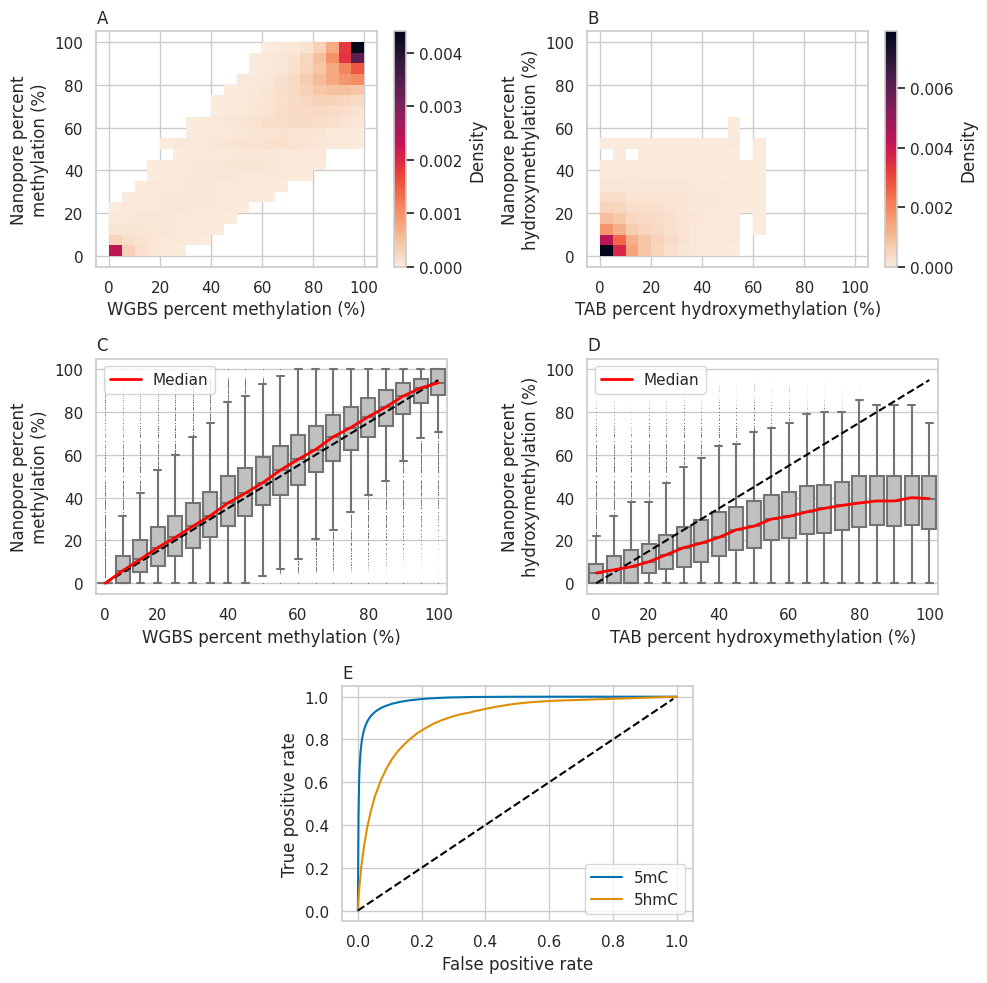

In [5]:
from matplotlib.gridspec import GridSpec

sns.set_theme(style="whitegrid")
sns.set_palette("colorblind")

fig1 = pl.figure(figsize=(10, 10)) 
gs1 = GridSpec(3, 4, fig1)

ax1 = fig1.add_subplot(gs1[0, :2])
ax2 = fig1.add_subplot(gs1[0, 2:])
ax3 = fig1.add_subplot(gs1[1, :2])
ax4 = fig1.add_subplot(gs1[1, 2:])

merged_mc_df = mergeModDFs(nano_mc_df, wgbs_df)

sns.histplot(merged_mc_df, x="percentMeth_BS", y="percentMeth_Nano", cmap="rocket_r", bins=20, pthresh=0.01, cbar=True, stat="density", ax=ax1, cbar_kws=dict(label="Density"))
ax1.set_xlabel("WGBS percent methylation (%)")
ax1.set_ylabel("Nanopore percent\nmethylation (%)")
ax1.set_title("A", loc="left")

merged_hmc_df = mergeModDFs(nano_hmc_df, tab_df)

sns.histplot(merged_hmc_df, x="percentMeth_BS", y="percentMeth_Nano", cmap="rocket_r", bins=20, pthresh=0.01, cbar=True, stat="density", ax=ax2, cbar_kws=dict(label="Density"))
ax2.set_xlabel("TAB percent hydroxymethylation (%)")
ax2.set_ylabel("Nanopore percent\nhydroxymethylation (%)")
ax2.set_title("B", loc="left")

sns.boxplot(binBenchmark(merged_mc_df), x="BS_bin", y="percentMeth_Nano", color="silver", fliersize=0.01, flierprops={"marker":"x"}, ax=ax3)
ax3.plot(np.arange(0, 20, 1), np.arange(0, 100, 5), linestyle="dashed", color="black", zorder=5)
ax3.set_xticks([0, 3, 7, 11, 15, 19], labels=["0", "20", "40", "60", "80", "100"])
ax3.set_xlabel("WGBS percent methylation (%)")
ax3.set_ylabel("Nanopore percent\nmethylation (%)")
ax3.plot(np.arange(0, 20, 1), linePlotWrapper(merged_mc_df)["percentMeth_Nano"], color="red", linewidth=2, label="Median", zorder=10)
ax3.legend()
ax3.set_title("C", loc="left")
sns.move_legend(ax3, "upper left")

sns.boxplot(binBenchmark(merged_hmc_df), x="BS_bin", y="percentMeth_Nano", color="silver", fliersize=0.01, flierprops={"marker":"x"}, ax=ax4)
ax4.plot(np.arange(0, 20, 1), np.arange(0, 100, 5), linestyle="dashed", color="black", zorder=5)
ax4.set_xticks([0, 3, 7, 11, 15, 19], labels=["0", "20", "40", "60", "80", "100"])
ax4.set_xlabel("TAB percent hydroxymethylation (%)")
ax4.set_ylabel("Nanopore percent\nhydroxymethylation (%)")
ax4.plot(np.arange(0, 20, 1), linePlotWrapper(merged_hmc_df)["percentMeth_Nano"], color="red", linewidth=2, label="Median", zorder=10)
ax4.legend()
ax4.set_title("D", loc="left")
sns.move_legend(ax4, "upper left")

ax5 = fig1.add_subplot(gs1[2, 1:3])
ax5.plot(ROCwrapper(merged_mc_df, threshold=50)[0], ROCwrapper(merged_mc_df, threshold=50)[1], '-', label="5mC")
ax5.plot(ROCwrapper(merged_hmc_df, threshold=50)[0], ROCwrapper(merged_hmc_df, threshold=50)[1], '-', label="5hmC")
ax5.set_xlabel("False positive rate")
ax5.set_ylabel("True positive rate")
ax5.plot(np.arange(0, 1, 0.01), np.arange(0, 1, 0.01), "black", linestyle="--")
ax5.legend()
ax5.set_title("E", loc="left")

fig1.tight_layout()

In [15]:
mc_binarised = ROCbinariser(binBenchmark(merged_mc_df), 50.0)
hmc_binarised = ROCbinariser(binBenchmark(merged_hmc_df), 50.0)

In [16]:
metrics.roc_auc_score(mc_binarised["binarised"], mc_binarised["percentMeth_Nano"])

0.9851352090156511

In [18]:
metrics.roc_auc_score(hmc_binarised["binarised"], hmc_binarised["percentMeth_Nano"])

0.89450212170618